In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

from sklearn import svm
import pandas as pd
import numpy as np
import os

from sklearn import metrics   #Additional scklearn functions

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (16, 8)
#print(__doc__)
import matlab.engine


In [ ]:
os.getcwd()
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/')
eng = matlab.engine.start_matlab()
eng.reading_hotspot2Data_v4(nargout=0)
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication/')
os.getcwd()

In [2]:
X=pd.read_csv('train_whole.csv',header=None)
y=pd.read_csv('label_whole.csv',header=None)

X_train = pd.read_csv('train.csv',header=None)
#X_valid = pd.read_csv('valid.csv',header=None)

y_train=pd.read_csv('label_train2.csv',header=None)
#y_valid=pd.read_csv('label_valid2.csv',header=None)

X_test=pd.read_csv('test.csv',header=None)
y_test=pd.read_csv('label_test2.csv',header=None)

X_train=X_train.T#transpose
#X_valid=X_valid.T
X=X.T
X_test=X_test.T

y_train=y_train.values.ravel()
#y_valid=y_valid.values.ravel()
y=y.values.ravel()
y_test=y_test.values.ravel()

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)
print(y)

(313, 58)
(126, 58)
(313,)
(126,)
[0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1
 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1]


In [3]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(0.96)

In [4]:
pca.fit(X)

PCA(n_components=0.96)

In [5]:
print(pca.explained_variance_)

[5.42928869 2.10159839 0.89338358 0.30176637 0.19806353 0.13004475
 0.11702392 0.05733391]


In [6]:
X = pca.transform(X)
X_test = pca.transform(X_test)
print(X.shape)

(313, 8)


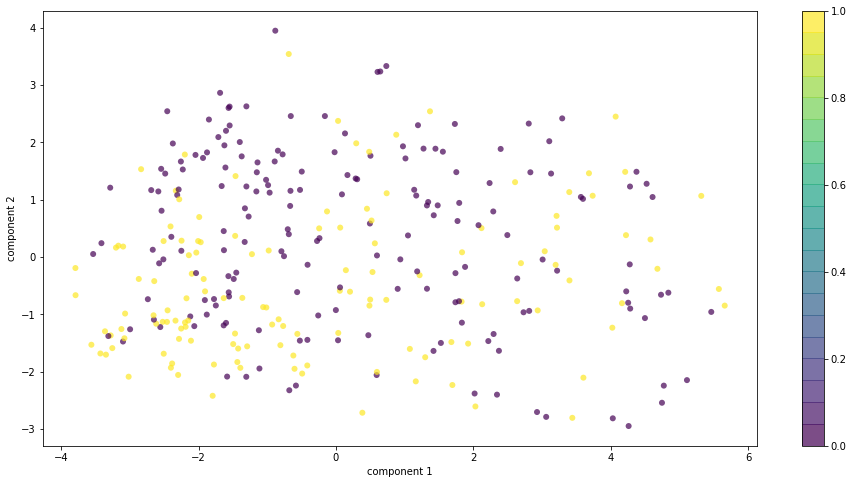

In [9]:
plt.scatter(X[:, 0], X[:, 1],
            c=y, edgecolor='none', alpha=0.7,
            cmap=plt.cm.get_cmap('viridis', 20))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.savefig('pca.png')

<Figure size 1152x576 with 0 Axes>

In [140]:
# Show the principal components
#pca = PCA().fit(X)
print("Principal components:")
print(pca.components_)

Principal components:
[[-6.22512938e-01 -4.55786348e-01 -8.56779957e-04 -7.06284529e-03
  -6.31507788e-03 -5.81315890e-03 -1.89385101e-02 -3.66850452e-03
  -1.71929511e-03 -2.40362094e-02 -9.42951759e-03 -9.27678170e-03
  -1.54344762e-02 -3.46976537e-03 -1.79914636e-02 -1.30190370e-02
  -2.58339276e-04 -1.12584522e-02 -4.40674905e-03 -6.93683130e-03
   2.16504622e-03 -2.75621955e-05 -1.16381296e-02 -3.05359246e-02
  -2.11735831e-02 -6.79358457e-03  3.47261356e-03  6.52541922e-02
  -3.34832999e-03 -5.29760415e-03  3.63149253e-01 -1.04960814e-02
  -1.17751509e-02 -7.57519249e-03 -1.34098772e-02 -2.13065310e-02
  -1.09099585e-02 -1.35006326e-02 -1.78576634e-02 -7.15586033e-03
  -1.11794481e-02 -1.65821959e-02 -1.07829967e-02 -1.38400707e-02
  -1.44449957e-02 -2.57862783e-02 -6.96742817e-03 -5.48960824e-03
  -2.44879094e-02 -7.72626798e-03 -9.90088960e-03  1.86209997e-01
   1.83666292e-01  1.73653473e-01  1.71110357e-01  3.61388921e-01
   3.35820031e-02  3.45312171e-02]
 [ 3.43273473e-01 -

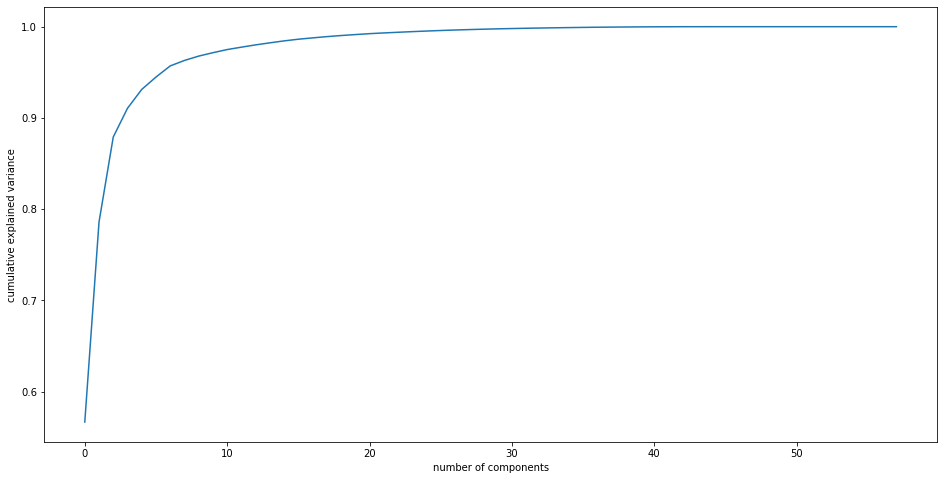

In [174]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.savefig('PCA1.png')

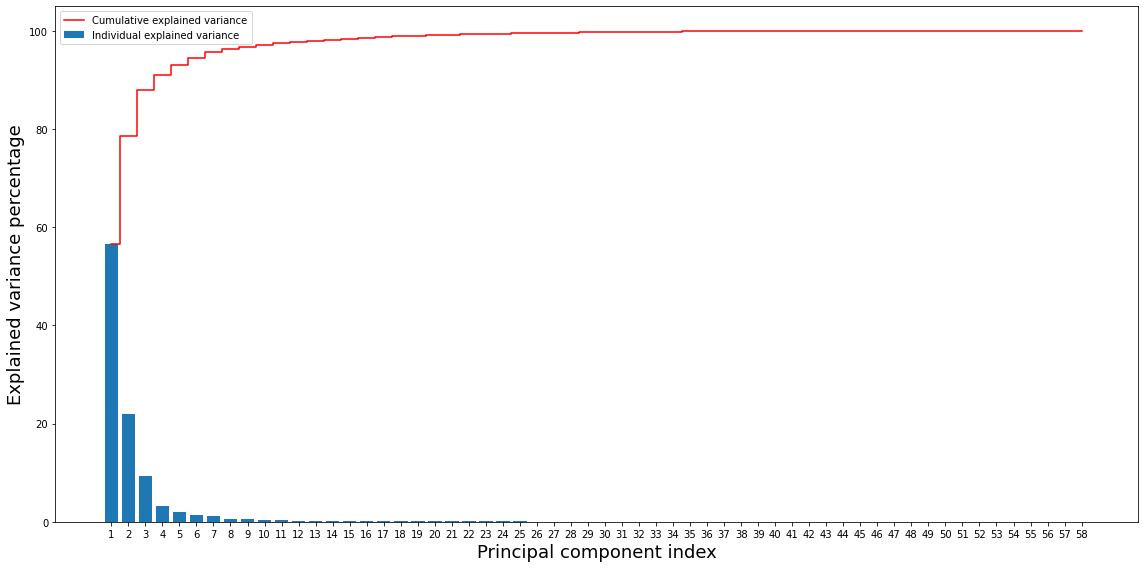

In [177]:
pca = PCA(n_components=None)
pca.fit(X)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

a = 59

plt.bar(range(1, a), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, a), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage',fontsize=18)
plt.xlabel('Principal component index',fontsize=18)
plt.xticks(ticks=list(range(1, a)))
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("cumulativeexplainedvarianceplot.png")


In [141]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [142]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
Acc=cross_val_score(rf, X, y, scoring='accuracy',
          cv=5)
 


Sen=cross_val_score(rf, X, y, scoring='recall',
          cv=5)
Sen.mean()  

Prec=cross_val_score(rf, X, y, scoring='precision',
          cv=5)
Prec.mean()  

F1=cross_val_score(rf, X, y, scoring='f1',
          cv=5)
F1.mean()  

AUC=cross_val_score(rf, X, y, scoring='roc_auc',
          cv=5)
AUC.mean()  

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import math

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}
cv_results = cross_validate(rf.fit(X, y), X, y,
                           scoring=scoring, cv=5)
tp=cv_results['test_tp'].mean()
fp=cv_results['test_fp'].mean()
tn=cv_results['test_tn'].mean()
fn=cv_results['test_fn'].mean()
print('tp: %.3f' % tp)
print('\n')
print('tn: %.3f' % tn)
print('\n')
print('fp: %.3f' % fp)
print('\n')
print('fn: %.3f' % fn)
print('\n')

specificity=tn/(tn+fp)


MCC= (tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))


tp: 15.000


tn: 26.000


fp: 10.000


fn: 11.600




In [143]:
print('Sensitivity: %.3f' % Sen.mean() )
print('Specificity: %.3f' %specificity)
print('Accuracy: %.3f' % Acc.mean() )
print('Precision: %.3f' % Prec.mean() )
print('F1: %.3f' % F1.mean() )
print('MCC:%.3f' %MCC)
print('AUC: %.3f' % AUC.mean() )

Sensitivity: 0.588
Specificity: 0.722
Accuracy: 0.671
Precision: 0.658
F1: 0.563
MCC:0.289
AUC: 0.701


In [144]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_test_pred = rf.predict(X_test) 
svm_roc_auc = roc_auc_score(y_test, y_test_pred)

In [145]:
from sklearn.metrics import confusion_matrix 
print('Accuracy of RF classifier: {:.2f}'.format(rf.score(X_test, y_test)))
print('\n')
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_test, y_test_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity

tn=confusion_matrix(y_test, y_test_pred)[0, 0]
fp=confusion_matrix(y_test, y_test_pred)[0, 1]
fn=confusion_matrix(y_test, y_test_pred)[1, 0]
tp=confusion_matrix(y_test, y_test_pred)[1, 1]
#sensitivity1=tp/(tp+fn)

#print('Sensitivity :', sensitivity1 )
#print('\n')

specificity1=tn/(tn+fp)
print('Specificity :', specificity1)
print('\n')
#precision=tp/(tp+fp)
#precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#print('precision :', precision)
#print('\n')
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import recall_score
print("Recall or Sensitivity: {}".format(recall_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_test, y_test_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of RF classifier: 0.69


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       63       15
Predicted Class 0       24       24




[[63 15]
 [24 24]]
Specificity : 0.7241379310344828


Precision score: 0.5


Recall or Sensitivity: 0.6153846153846154


F1 Score: 0.5517241379310345


Matthews Correlation Coefficient: 0.32321583473162474


AUC: 0.730




In [146]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_tuned_1 = GradientBoostingClassifier()
gbm_tuned_1.fit(X ,y)


GradientBoostingClassifier()

In [147]:
from sklearn.model_selection import cross_val_score

Acc=cross_val_score(gbm_tuned_1, X, y, scoring='accuracy',
          cv=5)
 


Sen=cross_val_score(gbm_tuned_1, X, y, scoring='recall',
          cv=5)
Sen.mean()  

Prec=cross_val_score(gbm_tuned_1, X, y, scoring='precision',
          cv=5)
Prec.mean()  

F1=cross_val_score(gbm_tuned_1, X, y, scoring='f1',
          cv=5)
F1.mean()  

AUC=cross_val_score(gbm_tuned_1, X, y, scoring='roc_auc',
          cv=5)
AUC.mean()  


from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import math

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}
cv_results = cross_validate(gbm_tuned_1.fit(X, y), X, y,
                           scoring=scoring, cv=5)
tp=cv_results['test_tp'].mean()
fp=cv_results['test_fp'].mean()
tn=cv_results['test_tn'].mean()
fn=cv_results['test_fn'].mean()
print('tp: %.3f' % tp)
print('\n')
print('tn: %.3f' % tn)
print('\n')
print('fp: %.3f' % fp)
print('\n')
print('fn: %.3f' % fn)
print('\n')

specificity=tn/(tn+fp)


MCC= (tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))


tp: 16.000


tn: 25.200


fp: 10.800


fn: 10.600




In [148]:
print('Sensitivity: %.3f' % Sen.mean() )
print('Specificity: %.3f' %specificity)
print('Accuracy: %.3f' % Acc.mean() )
print('Precision: %.3f' % Prec.mean() )
print('F1: %.3f' % F1.mean() )
print('MCC:%.3f' %MCC)
print('AUC: %.3f' % AUC.mean() )

Sensitivity: 0.595
Specificity: 0.700
Accuracy: 0.659
Precision: 0.612
F1: 0.594
MCC:0.301
AUC: 0.677


In [149]:
y_test_pred=gbm_tuned_1.predict(X_test)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_test_pred = gbm_tuned_1.predict(X_test) 
svm_roc_auc = roc_auc_score(y_test, y_test_pred)

In [150]:
from sklearn.metrics import confusion_matrix 
print('Accuracy of GBM classifier: {:.2f}'.format(gbm_tuned_1.score(X_test, y_test)))
print('\n')
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_test, y_test_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity

tn=confusion_matrix(y_test, y_test_pred)[0, 0]
fp=confusion_matrix(y_test, y_test_pred)[0, 1]
fn=confusion_matrix(y_test, y_test_pred)[1, 0]
tp=confusion_matrix(y_test, y_test_pred)[1, 1]
#sensitivity1=tp/(tp+fn)

#print('Sensitivity :', sensitivity1 )
#print('\n')

specificity1=tn/(tn+fp)
print('Specificity :', specificity1)
print('\n')
#precision=tp/(tp+fp)
#precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#print('precision :', precision)
#print('\n')
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import recall_score
print("Recall or Sensitivity: {}".format(recall_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_test, y_test_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_test, gbm_tuned_1.predict_proba(X_test)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of GBM classifier: 0.67


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       63       18
Predicted Class 0       24       21




[[63 18]
 [24 21]]
Specificity : 0.7241379310344828


Precision score: 0.4666666666666667


Recall or Sensitivity: 0.5384615384615384


F1 Score: 0.5


Matthews Correlation Coefficient: 0.2533593918376833


AUC: 0.642




In [151]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(objective="binary:logistic", random_state=0,use_label_encoder=False)
xgb_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [152]:
from xgboost import XGBClassifier
xgb_m=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
xgb_m.fit(X ,y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [153]:
from sklearn.model_selection import cross_val_score

Acc=cross_val_score(xgb_m, X, y, scoring='accuracy',
          cv=5)
 


Sen=cross_val_score(xgb_m, X, y, scoring='recall',
          cv=5)
Sen.mean()  

Prec=cross_val_score(xgb_m, X, y, scoring='precision',
          cv=5)
Prec.mean()  

F1=cross_val_score(xgb_m, X, y, scoring='f1',
          cv=5)
F1.mean()  

AUC=cross_val_score(xgb_m, X, y, scoring='roc_auc',
          cv=5)
AUC.mean()  


from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import math

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}
cv_results = cross_validate(xgb_m.fit(X, y), X, y,
                           scoring=scoring, cv=5)
tp=cv_results['test_tp'].mean()
fp=cv_results['test_fp'].mean()
tn=cv_results['test_tn'].mean()
fn=cv_results['test_fn'].mean()
print('tp: %.3f' % tp)
print('\n')
print('tn: %.3f' % tn)
print('\n')
print('fp: %.3f' % fp)
print('\n')
print('fn: %.3f' % fn)
print('\n')

specificity=tn/(tn+fp)


MCC= (tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))


tp: 16.000


tn: 24.800


fp: 11.200


fn: 10.600




In [154]:
print('Sensitivity: %.3f' % Sen.mean() )
print('Specificity: %.3f' %specificity)
print('Accuracy: %.3f' % Acc.mean() )
print('Precision: %.3f' % Prec.mean() )
print('F1: %.3f' % F1.mean() )
print('MCC:%.3f' %MCC)
print('AUC: %.3f' % AUC.mean() )

Sensitivity: 0.602
Specificity: 0.689
Accuracy: 0.652
Precision: 0.596
F1: 0.595
MCC:0.290
AUC: 0.698


In [155]:
y_test_pred=xgb_m.predict(X_test)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_test_pred = xgb_m.predict(X_test) 
xgb_roc_auc = roc_auc_score(y_test, y_test_pred)

In [156]:
from sklearn.metrics import confusion_matrix 
print('Accuracy of XGB classifier: {:.2f}'.format(xgb_m.score(X_test, y_test)))
print('\n')
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_test, y_test_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity

tn=confusion_matrix(y_test, y_test_pred)[0, 0]
fp=confusion_matrix(y_test, y_test_pred)[0, 1]
fn=confusion_matrix(y_test, y_test_pred)[1, 0]
tp=confusion_matrix(y_test, y_test_pred)[1, 1]
#sensitivity1=tp/(tp+fn)

#print('Sensitivity :', sensitivity1 )
#print('\n')

specificity1=tn/(tn+fp)
print('Specificity :', specificity1)
print('\n')
#precision=tp/(tp+fp)
#precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#print('precision :', precision)
#print('\n')
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import recall_score
print("Recall or Sensitivity: {}".format(recall_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_test, y_test_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_test, xgb_m.predict_proba(X_test)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of XGB classifier: 0.66


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       61       17
Predicted Class 0       26       22




[[61 17]
 [26 22]]
Specificity : 0.7011494252873564


Precision score: 0.4583333333333333


Recall or Sensitivity: 0.5641025641025641


F1 Score: 0.5057471264367815


Matthews Correlation Coefficient: 0.25251237088408185


AUC: 0.692




In [157]:
my_svm=SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
my_svm.fit(X, y)
y_test_pred_svm = my_svm.predict(X_test) 


In [158]:
from sklearn.model_selection import cross_val_score

Acc=cross_val_score(my_svm, X, y, scoring='accuracy',
          cv=5)
 


Sen=cross_val_score(my_svm, X, y, scoring='recall',
          cv=5)
Sen.mean()  

Prec=cross_val_score(my_svm, X, y, scoring='precision',
          cv=5)
Prec.mean()  

F1=cross_val_score(my_svm, X, y, scoring='f1',
          cv=5)
F1.mean()  

AUC=cross_val_score(my_svm, X, y, scoring='roc_auc',
          cv=5)
AUC.mean()  


from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import math

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}
cv_results = cross_validate(my_svm.fit(X, y), X, y,
                           scoring=scoring, cv=5)
tp=cv_results['test_tp'].mean()
fp=cv_results['test_fp'].mean()
tn=cv_results['test_tn'].mean()
fn=cv_results['test_fn'].mean()
print('tp: %.3f' % tp)
print('\n')
print('tn: %.3f' % tn)
print('\n')
print('fp: %.3f' % fp)
print('\n')
print('fn: %.3f' % fn)
print('\n')

specificity=tn/(tn+fp)


MCC= (tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))


tp: 9.600


tn: 31.600


fp: 4.400


fn: 17.000




In [159]:
print('Sensitivity: %.3f' % Sen.mean() )
print('Specificity: %.3f' %specificity)
print('Accuracy: %.3f' % Acc.mean() )
print('Precision: %.3f' % Prec.mean() )
print('F1: %.3f' % F1.mean() )
print('MCC:%.3f' %MCC)
print('AUC: %.3f' % AUC.mean() )

Sensitivity: 0.360
Specificity: 0.878
Accuracy: 0.658
Precision: 0.696
F1: 0.470
MCC:0.283
AUC: 0.720


In [160]:
y_test_pred_svm = my_svm.predict(X_test) 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_test_pred_svm = my_svm.predict(X_test) 
svm_roc_auc = roc_auc_score(y_test, y_test_pred)

In [161]:
from sklearn.metrics import confusion_matrix 
print('Accuracy of svm classifier: {:.2f}'.format(my_svm.score(X_test, y_test)))
print('\n')
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_test, y_test_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity

tn=confusion_matrix(y_test, y_test_pred)[0, 0]
fp=confusion_matrix(y_test, y_test_pred)[0, 1]
fn=confusion_matrix(y_test, y_test_pred)[1, 0]
tp=confusion_matrix(y_test, y_test_pred)[1, 1]
#sensitivity1=tp/(tp+fn)

#print('Sensitivity :', sensitivity1 )
#print('\n')

specificity1=tn/(tn+fp)
print('Specificity :', specificity1)
print('\n')
#precision=tp/(tp+fp)
#precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#print('precision :', precision)
#print('\n')
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import recall_score
print("Recall or Sensitivity: {}".format(recall_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_test, y_test_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_test, my_svm.predict_proba(X_test)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of svm classifier: 0.71


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       61       17
Predicted Class 0       26       22




[[61 17]
 [26 22]]
Specificity : 0.7011494252873564


Precision score: 0.4583333333333333


Recall or Sensitivity: 0.5641025641025641


F1 Score: 0.5057471264367815


Matthews Correlation Coefficient: 0.25251237088408185


AUC: 0.707


